# Assignment 1 : Measuring Fairness
Anukul Kumar Singh <br>
Apr 9th 2024

Please complete the code in this notebook to make every print function work as expected. To finish this assignment,
you will need to carefully go through the notebook, understand each steps, and when you encounter " #replace this with your own code!!!", fill it up with correct answers.


## Step 1: Download Dataset

For this Assignment, we will use the German Credit Dataset. To download German Credit data, you will need to install the package 'ucimlrepo'. For example, you might want to run 'pip install ucimlrepo' on your comment line.
Similarily, you need to install packages 'pandas', 'numpy', 'sklearn', and 'matplotlib' if not yet.

In [1]:
!pip install ucimlrepo

In [2]:
#import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
# fetch dataset
df = fetch_ucirepo(id=144) ##144 is for German Credit data, different id gives you different dataset in UC Irvine Machine Learning Repository.

# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

# variable information
print(df.variables)

           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [4]:
# You may take a look on the top few rows of the dataset
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


## Step 2: preprocessing the data

### First, let's preprocessing the sensitive feature that we are interested in.
 In this dataset, we use sex (women vs. men)as the sensitive feature of interest. Attribute 9 provide us sex information, so we use it to creat a binary group indicator. And group = 1 represents men and group = 0 represents women.

#### Attribute 9: (qualitative) Personal status and sex
A91 : male : divorced/separated <br>
A92 : female : divorced/separated/married <br>
A93 : male : single <br>
A94 : male : married/widowed <br>
A95 : female : single <br>

In [5]:
X['Attribute9'].value_counts() # check the distibution of Attribute 9

Attribute9
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64

In [6]:
#Start processing the sensitive feature
import numpy as np
groups = np.ones((len(y),)) #Creat an ones array with length equal to the full samlple size. (g1: men)
groups[X['Attribute9'].isin(['A92', 'A95'])] =0 #replace the group value for women instances as 0. (g0: women)
X = X.drop(['Attribute9'], axis=1)#drop the sensitive feature we used to create the group membership, we also do not want the classifier to use it.
print(groups) #check the binary group indicator we just created


[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.

### Second, let's process the y varibale to make it binary

 #### Y variable (class): 1 = Good, 2 = Bad

In [7]:
y.value_counts() # check the distribution of y

class
1        700
2        300
Name: count, dtype: int64

In [8]:
# We want to transfer the target variable into binary as well, so 1 = Good, 0 = Bad. To do so, we use the mask function.
#Function reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html
y = y.mask(y == 2, 0)
y = np.ravel(y) #flatten the target variable for latter use

### Third, transfer the categorical features to dummy variables

In [9]:
X = pd.get_dummies(X) #function reference: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [10]:
#concatenate X , groups, and y to make them a whole dataset, this makes training and testing spliting easiler
df = pd.concat([X,pd.DataFrame({'groups': groups}),pd.DataFrame({'target': y})],axis=1)

In [11]:
df.columns # make sure the we have 'groups' and 'target' as the very last two columns of the dataframe.

Index(['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13',
       'Attribute16', 'Attribute18', 'Attribute1_A11', 'Attribute1_A12',
       'Attribute1_A13', 'Attribute1_A14', 'Attribute3_A30', 'Attribute3_A31',
       'Attribute3_A32', 'Attribute3_A33', 'Attribute3_A34', 'Attribute4_A40',
       'Attribute4_A41', 'Attribute4_A410', 'Attribute4_A42', 'Attribute4_A43',
       'Attribute4_A44', 'Attribute4_A45', 'Attribute4_A46', 'Attribute4_A48',
       'Attribute4_A49', 'Attribute6_A61', 'Attribute6_A62', 'Attribute6_A63',
       'Attribute6_A64', 'Attribute6_A65', 'Attribute7_A71', 'Attribute7_A72',
       'Attribute7_A73', 'Attribute7_A74', 'Attribute7_A75',
       'Attribute10_A101', 'Attribute10_A102', 'Attribute10_A103',
       'Attribute12_A121', 'Attribute12_A122', 'Attribute12_A123',
       'Attribute12_A124', 'Attribute14_A141', 'Attribute14_A142',
       'Attribute14_A143', 'Attribute15_A151', 'Attribute15_A152',
       'Attribute15_A153', 'Attribute17_A171

### Lastly, split the training set and testing set based on the group ratio, and positive ratio for each group

In [12]:
def train_test_prepare(df, positive_rate_g0, positive_rate_g1, g0_ratio, train_ratio = 0.7, rnd_seed = 1):
    '''
    This function is spliting the dataset into training and testing (training/testing = 7/3).
    At the same time, the spliting is stratified with regard to 1)the positive rates of each group and 2)the group ratio
    '''
    ######
    response = 'target'
    sensitive = 'groups'
    atr = df.columns[0:-2]

    train00 = df[(df[sensitive]==0)&(df[response]==0)].sample(n = int(len(df)*(train_ratio*g0_ratio*(1-positive_rate_g0))), random_state = rnd_seed)
    train01 = df[(df[sensitive]==0)&(df[response]==1)].sample(n = int(len(df)*(train_ratio*g0_ratio*positive_rate_g0)), random_state = rnd_seed)
    train10 = df[(df[sensitive]==1)&(df[response]==0)].sample(n = int(len(df)*(train_ratio*(1-g0_ratio)*(1-positive_rate_g1))), random_state = rnd_seed)
    train11 = df[(df[sensitive]==1)&(df[response]==1)].sample(n = int(len(df)*(train_ratio*(1-g0_ratio)*positive_rate_g1)), random_state = rnd_seed)

    train = pd.concat([train00, train01, train10, train11])
    test  = df.drop(train.index)
    #train, test = np.split(df.sample(frac=1, random_state=rnd_seed), [int(.7*len(df))])

    print('train shape  =', train.shape)

    print('train shape (g0) = ', train[train[sensitive]==0].shape)
    print('train shape (g1) = ', train[train[sensitive]==1].shape)
    print('test shape =', test.shape)
    print('test shape (g0) = ', test[test[sensitive]==0].shape)
    print('test shape (g1) = ', test[test[sensitive]==1].shape)

    X = train[atr]
    X_s = train[sensitive]
    y = train[response]
    Xt = test[atr]
    Xt_s = test[sensitive]
    yt = test[response]
    return X, X_s, y, Xt, Xt_s, yt

In [27]:
# calculate the positive_rate_g0, positive_rate_g1, and g0_ratio.
positive_rate_g0 = sum(y[groups == 0])/len(y[groups == 0])
positive_rate_g1 = sum(y[groups == 1])/len(y[groups == 1])
print('The positive rate for group 0 (Women) is: {}.'.format(format(positive_rate_g0, '.2f')))
print('The positive rate for group 1 (Men) is: {}.'.format(format(positive_rate_g1, '.2f')))

g0_ratio = len(groups[groups == 0]) / len(groups)
print('There are {} of the instances are Women.'.format(format(g0_ratio, '.2f')))

The positive rate for group 0 (Women) is: 0.65.
The positive rate for group 1 (Men) is: 0.72.
There are 0.31 of the instances are Women.


In [28]:
#Call the train_test_prepare function to split the dataset
X_train, X_s_train, y_train, X_test, X_s_test, y_test = train_test_prepare(df, positive_rate_g0, positive_rate_g1, g0_ratio)


train shape  = (698, 59)
train shape (g0) =  (216, 59)
train shape (g1) =  (482, 59)
test shape = (302, 59)
test shape (g0) =  (94, 59)
test shape (g1) =  (208, 59)


## Step 3: Train a classifier and make predictions on the testing set

In [29]:
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators = 100, random_state=666)
clf.fit(X_train, y_train)

#predictions on the testing set
y_hat = clf.predict(X_test)

## Step 4: Fairness Auditing

In [30]:
# Calculate the confusion matrix
TPR = sum((y_hat == 1) & (y_test == 1))/sum(y_test == 1)
print('The true positive rate for the whole dataset is: ', format(TPR, '.2f'))
FPR = sum((y_hat == 1) & (y_test == 0)) / sum(y_test == 0)
print('The false positive rate for the whole dataset is: ', format(FPR, '.2f'))
TNR = sum((y_hat == 0) & (y_test == 0)) / sum(y_test == 0)
print('The ture negative rate for the whole dataset is: ', format(TNR, '.2f'))
FNR = sum((y_hat == 0) & (y_test == 1)) / sum(y_test == 1)
print('The false negative rate for the whole dataset is: ', format(FNR, '.2f'))

The true positive rate for the whole dataset is:  0.91
The false positive rate for the whole dataset is:  0.62
The ture negative rate for the whole dataset is:  0.38
The false negative rate for the whole dataset is:  0.09


In [31]:
# Calculate the group specific confusion matrix
TPR_g0 = sum((y_hat == 1) & (y_test == 1) & (X_s_test == 0))/sum((y_test == 1) & (X_s_test == 0))
TPR_g1 = sum((y_hat == 1) & (y_test == 1) & (X_s_test == 1))/sum((y_test == 1) & (X_s_test == 1))
print('The true positive rate for group 0 is: ', format(TPR_g0, '.2f'))
print('The true positive rate for group 1 is: ', format(TPR_g1, '.2f'))
FPR_g0 = sum((y_hat == 1) & (y_test == 0) & (X_s_test == 0))/sum((y_test == 0) & (X_s_test == 0))
FPR_g1 = sum((y_hat == 1) & (y_test == 0) & (X_s_test == 1))/sum((y_test == 0) & (X_s_test == 1))
print('The false positive rate for group 0 is: ', format(FPR_g0, '.2f'))
print('The false positive rate for group 1 is: ', format(FPR_g1, '.2f'))
TNR_g0 = sum((y_hat == 0) & (y_test == 0) & (X_s_test == 0))/sum((y_test == 0) & (X_s_test == 0))
TNR_g1 = sum((y_hat == 0) & (y_test == 0) & (X_s_test == 1))/sum((y_test == 0) & (X_s_test == 1))
print('The ture negative rate for group 0 is:', format(TNR_g0, '.2f'))
print('The ture negative rate for group 1 is:', format(TNR_g1, '.2f'))
FNR_g0 = sum((y_hat == 0) & (y_test == 1) & (X_s_test == 0))/sum((y_test == 1) & (X_s_test == 0))
FNR_g1 = sum((y_hat == 0) & (y_test == 1) & (X_s_test == 1))/sum((y_test == 1) & (X_s_test == 1))
print('The false negative rate for group 0 is:', format(FNR_g0, '.2f'))
print('The false negative rate for group 1 is:', format(FNR_g1, '.2f'))

The true positive rate for group 0 is:  0.87
The true positive rate for group 1 is:  0.92
The false positive rate for group 0 is:  0.61
The false positive rate for group 1 is:  0.62
The ture negative rate for group 0 is: 0.39
The ture negative rate for group 1 is: 0.38
The false negative rate for group 0 is: 0.13
The false negative rate for group 1 is: 0.08


### Let's visulize the detailed items in the confusion matrix we just computed

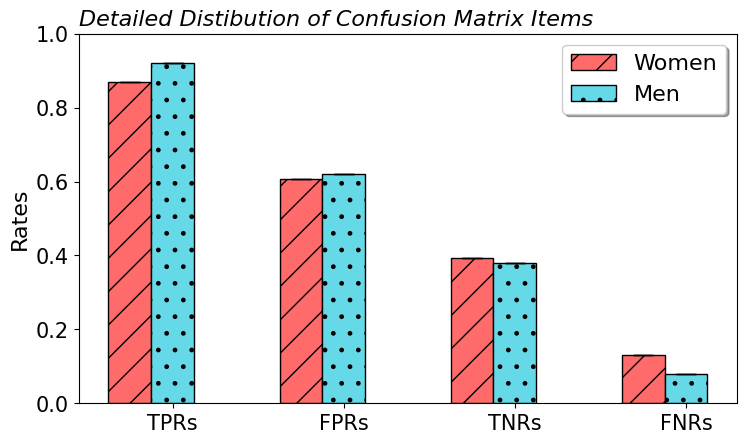

In [32]:
g0 = 'Women'
g1 = 'Men'

# Set the x position of bars
r1 = np.arange(4)
barWidth = 0.25 # width of the bars
r2 = [x + barWidth for x in r1]

# Create bars
plt.rcParams["figure.figsize"] = [8.5, 4.8]
plt.bar(r1, [TPR_g0, FPR_g0, TNR_g0, FNR_g0], width = barWidth, color = '#ff6b6b', edgecolor = 'black', yerr=0, capsize=7, hatch='/', label=g0)
plt.bar(r2, [TPR_g1, FPR_g1, TNR_g1, FNR_g1], width = barWidth, color = '#66d9e8', edgecolor = 'black', yerr=0, capsize=7, hatch='.', label=g1)

# general layout
plt.ylim(0, 1)
plt.xticks([r + barWidth for r in range(4)], ['TPRs', 'FPRs', 'TNRs', 'FNRs'])
plt.ylabel('Rates', fontsize = 16)

# Title and lengend
plt.title('Detailed Distibution of Confusion Matrix Items', fontsize = 16, style='italic', loc='left')
plt.yticks(fontsize=15, rotation=360)
plt.xticks(fontsize=15, rotation=360)
plt.legend(loc='best', fontsize = 16, fancybox=True, shadow=True, ncol= 1)

# show the plot
#plt.savefig('Bar_plot_CMs.pdf',bbox_inches = 'tight') #uncomment this if you want to save the plot as pdf, so it can be used as a high resolution plot
plt.show()


### Measuring Demographic Parity

In [33]:
positive_rate_g0 = sum((y_hat == 1) & (X_s_test == 0)) / sum(X_s_test == 0)
positive_rate_g1 = sum((y_hat == 1) & (X_s_test == 1)) / sum(X_s_test == 1)
DP_violat = abs(positive_rate_g0 - positive_rate_g1)
print('The violation of demographic parity is', format(DP_violat, '.2f'))

The violation of demographic parity is 0.06


### Measuring Equlized Odds

In [34]:
Equal_Odds_violat = max(abs(TPR_g0 - TPR_g1), abs(FPR_g0 - FPR_g1))
print('The violation of equalized odds is', format(Equal_Odds_violat, '.2f'))

The violation of equalized odds is 0.05


### Measuring Predctive Parity

In [35]:
precision_g0 = sum((y_hat == 1) & (y_test == 1) & (X_s_test == 0)) / sum((y_hat == 1) & (X_s_test == 0))
precision_g1 = sum((y_hat == 1) & (y_test == 1) & (X_s_test == 1)) / sum((y_hat == 1) & (X_s_test == 1))
pred_parity_violat = abs(precision_g0 - precision_g1)
print('The violation of predictive parity is', format(pred_parity_violat, '.2f'))

The violation of predictive parity is 0.07


###  Visulize the three measures we just calculated.
Specifically, you should create bars representing positive rates, recalls, and precisions for each group to facilitate comparison. Employ varied colors to distinguish between the groups.

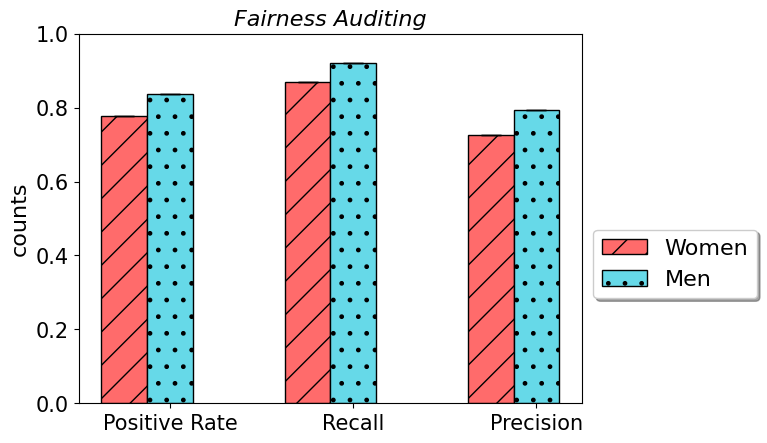

In [36]:
# Set the x position of bars
r1 = np.arange(3)
barWidth = 0.25 # width of the bars
r2 = [x + barWidth for x in r1]

# Create bars
plt.rcParams["figure.figsize"] = [6.5, 4.8]
plt.bar(r1, [positive_rate_g0, TPR_g0, precision_g0], width = barWidth, color = '#ff6b6b', edgecolor = 'black', yerr=0, capsize=7, hatch='/', label=g0)
plt.bar(r2, [positive_rate_g1, TPR_g1, precision_g1], width = barWidth, color = '#66d9e8', edgecolor = 'black', yerr=0, capsize=7, hatch='.', label=g1)

# general layout
plt.ylim(0, 1)
plt.xticks([r + barWidth for r in range(3)], ['Positive Rate', 'Recall', 'Precision'])
plt.ylabel('counts', fontsize = 16)

# Title and lengend
plt.title('Fairness Auditing', fontsize = 16, style='italic', loc='center')
plt.yticks(fontsize=15, rotation=360)
plt.xticks(fontsize=15, rotation=360)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), fontsize = 16, fancybox=True, shadow=True, ncol= 1)

# show the plot
#plt.savefig('Bar_plot_Measures.pdf',bbox_inches = 'tight') #uncomment this if you want to save the plot as pdf, so it can be used as a high resolution plot
plt.show()


# Congratulations, you made it!